<h1 style="text-align:center"> Regression </h1>

## Data collection

- Dataset: Titatnic
- Version: 2
- See in [dataset.txt](dataset.txt)

## Preprocessing

### Import

In [ ]:
import pandas as pd

!pip install scikit-learn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

!pip install xgboost
from xgboost import XGBClassifier, XGBRegressor

### Create DataFrame

In [ ]:
df = pd.read_excel('titanic3.xls')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


## Data Cleaning


In [ ]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [ ]:
df['age'].fillna(df['age'].mean(), inplace = True)
df['fare'].fillna(df['fare'].mean(), inplace = True)
df['cabin'] = df['cabin'].fillna(df['cabin'].mode()[0])
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['home.dest'] = df['home.dest'].fillna(df['home.dest'].mode()[0])
df.drop('boat', axis = 1, inplace = True)
df.drop('body', axis = 1, inplace = True)
df.drop('name', axis = 1, inplace = True)
df.drop('survived', axis = 1, inplace = True)
df

,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1,female,29.000000,0,0,24160,211.3375,B5,S,"St Louis, MO"
1,1,male,0.916700,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,1,female,2.000000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,1,male,30.000000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,1,female,25.000000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...
1304,3,female,14.500000,1,0,2665,14.4542,C23 C25 C27,C,"New York, NY"
1305,3,female,29.881135,1,0,2665,14.4542,C23 C25 C27,C,"New York, NY"
1306,3,male,26.500000,0,0,2656,7.2250,C23 C25 C27,C,"New York, NY"
1307,3,male,27.000000,0,0,2670,7.2250,C23 C25 C27,C,"New York, NY"


In [ ]:
# check missing again
df.isnull().sum()

pclass       0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
home.dest    0
dtype: int64

In [ ]:
# change data type from number to string
df['ticket'] = df['ticket'].astype(str)

### Label data

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['sex'] = encoder.fit_transform(df['sex'])
df['pclass'] = encoder.fit_transform(df['pclass'])
df['sibsp'] = encoder.fit_transform(df['sibsp'])
df['parch'] = encoder.fit_transform(df['parch'])
df['cabin'] = encoder.fit_transform(df['cabin'])
df['embarked'] = encoder.fit_transform(df['embarked'])
df['home.dest'] = encoder.fit_transform(df['home.dest'])
df['ticket'] = encoder.fit_transform(df['ticket'])
df

,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,0,0,29.000000,0,0,187,211.3375,43,2,308
1,0,1,0.916700,1,2,49,151.5500,79,2,230
2,0,0,2.000000,1,2,49,151.5500,79,2,230
3,0,1,30.000000,1,2,49,151.5500,79,2,230
4,0,0,25.000000,1,2,49,151.5500,79,2,230
...,...,...,...,...,...,...,...,...,...,...
1304,2,0,14.500000,1,0,259,14.4542,80,0,236
1305,2,0,29.881135,1,0,259,14.4542,80,0,236
1306,2,1,26.500000,0,0,250,7.2250,80,0,236
1307,2,1,27.000000,0,0,264,7.2250,80,0,236


In [ ]:
# check type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   sex        1309 non-null   int64  
 2   age        1309 non-null   float64
 3   sibsp      1309 non-null   int64  
 4   parch      1309 non-null   int64  
 5   ticket     1309 non-null   int64  
 6   fare       1309 non-null   float64
 7   cabin      1309 non-null   int64  
 8   embarked   1309 non-null   int64  
 9   home.dest  1309 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 102.4 KB


## Feature selection

In [ ]:
X = df[['pclass','sex','sibsp','parch','fare','cabin','ticket','embarked']]
Y = df['age']

In [ ]:
print("X -->", X.shape)
print("Y -->", Y.shape)

X --> (1309, 8)
Y --> (1309,)


In [ ]:
# size of testing set is 20% of total data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("Y_train: ", Y_train.shape)
print("Y_test: ", Y_test.shape)

X_train:  (1047, 8)
X_test:  (262, 8)
Y_train:  (1047,)
Y_test:  (262,)


## Model selection + Model training

### 1. LinearRegression

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, Y_train)
linreg_pred = linreg.predict(X_test)

In [ ]:
linreg_mae = mean_absolute_error(Y_test, linreg_pred)
linreg_r2 = r2_score(Y_test, linreg_pred)
print("MAE of the linear regression model is: ", linreg_mae)
print("R2 sroce of the linear regression model is:", linreg_r2)

MAE of the linear regression model is:  8.860858021204411
R2 sroce of the linear regression model is: 0.18464499419708003


### 2. XGBoost

In [ ]:
xgb = XGBRegressor()
xgb.fit(X_train, Y_train)
xgb_pred = xgb.predict(X_test)

In [ ]:
xgb_mae = mean_absolute_error(Y_test, xgb_pred)
xgb_r2 = r2_score(Y_test, xgb_pred)
print("MAE of the linear XGBoost model is: ", xgb_mae)
print("R2 sroce of the linear XGBoost model is:", xgb_r2)

MAE of the linear XGBoost model is:  9.186136984318626
R2 sroce of the linear XGBoost model is: 0.08632784996071452


### 3. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tr = DecisionTreeRegressor()
tr.fit(X_train, Y_train)
tr_predict = tr.predict(X_test)

In [ ]:
tr_mae = mean_absolute_error(Y_test,tr_predict)
tr_r2 = r2_score(Y_test,tr_predict)
print("MAE of the linear Decision Tree Regression model is: ",tr_mae)
print("R2 sroce of the linear Decision Tree Regression model is:", tr_r2)

MAE of the linear Decision Tree Regression model is:  9.725925738102015
R2 sroce of the linear Decision Tree Regression model is: -0.08839559492867588


### 4. Randow Forest 

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)
rf_pred = rf.predict(X_test)

In [ ]:
rf_mae = mean_absolute_error(Y_test, rf_pred)
rf_r2 = r2_score(Y_test, rf_pred)
print("MAE of the linear Randow Forest model is: ",rf_mae)
print("R2 sroce of the linear Randow Forest model is:", rf_r2)

MAE of the linear Randow Forest model is:  8.727069626839572
R2 sroce of the linear Randow Forest model is: 0.2247034057948255


<h1 style="text-align:center"> Classification</h1>

## Data collection
- Dataset: Titanic
- Version: 1
- See in [dataset.txt](dataset.txt)

## Data preprocessing

In [3]:
import pandas as pd

# read data in file .csv
df = pd.read_csv('train.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [393]:
len(df)

891

In [394]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [395]:
# describe the data
df.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [396]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [397]:
# check data type
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### handling missing and duplicated value

In [398]:
# check missing value
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [399]:
# drop missing value
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Cabin'] = df['Cabin'].fillna('A0')
df['Embarked'] = df['Embarked'].fillna('A')

df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [400]:
# check duplicate
df.duplicated().sum()

0

<Axes: xlabel='Embarked'>

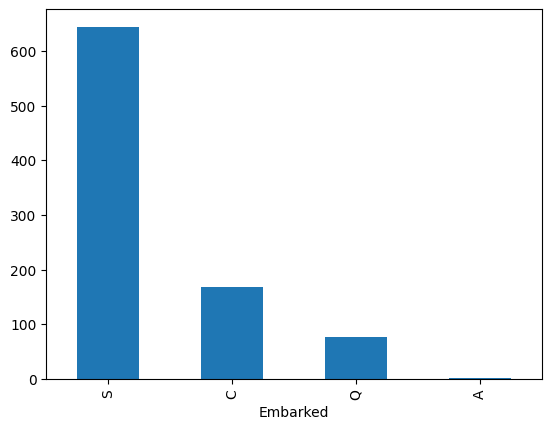

In [401]:
columns = df.columns

g = df[columns[-1]].value_counts()
g.plot.bar()

### Data Transformation + Feature selection

In [402]:
# label the object data
from sklearn.preprocessing import LabelEncoder 
types = df.dtypes
le = LabelEncoder()
for i in range(len(types)):
  if types[i]=='object':
    le.fit_transform(df[columns[i]])
    df[columns[i]] = le.transform(df[columns[i]])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.000000,1,0,523,7.2500,0,3
1,2,1,1,190,0,38.000000,1,0,596,71.2833,82,1
2,3,1,3,353,0,26.000000,0,0,669,7.9250,0,3
3,4,1,1,272,0,35.000000,1,0,49,53.1000,56,3
4,5,0,3,15,1,35.000000,0,0,472,8.0500,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.000000,0,0,101,13.0000,0,3
887,888,1,1,303,0,19.000000,0,0,14,30.0000,31,3
888,889,0,3,413,0,29.699118,1,2,675,23.4500,0,3
889,890,1,1,81,1,26.000000,0,0,8,30.0000,61,1


In [403]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name             int32
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket           int32
Fare           float64
Cabin            int32
Embarked         int32
dtype: object

In [404]:
data = df.values
print(data[:2])

X= data[:,:-1]
Y= data[:,-1]

[[  1.       0.       3.     108.       1.      22.       1.       0.
  523.       7.25     0.       3.    ]
 [  2.       1.       1.     190.       0.      38.       1.       0.
  596.      71.2833  82.       1.    ]]


In [405]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
print(X_scaled[0])

[0.         0.         1.         0.12134831 1.         0.27117366
 0.125      0.         0.76911765 0.01415106 0.        ]


In [406]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled,Y,random_state=42, test_size=0.2)
X_train.shape, y_train.shape

((712, 11), (712,))

## Model Selection

In [407]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

## Model training + Model evaluation

In [408]:
# KNN
model = KNeighborsClassifier()
model.fit(X_train,y_train)

y_predict = model.predict(X_test)

In [409]:
# evaluation 
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         1.0       0.58      0.42      0.49        43
         2.0       0.57      0.47      0.52        17
         3.0       0.77      0.87      0.81       119

    accuracy                           0.72       179
   macro avg       0.64      0.58      0.61       179
weighted avg       0.70      0.72      0.71       179



In [410]:
# DecisionTree
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

y_predict = model.predict(X_test)

In [411]:
# evaluation
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.78      0.58      0.67        43
         2.0       0.74      0.82      0.78        17
         3.0       0.83      0.89      0.86       119

    accuracy                           0.81       179
   macro avg       0.59      0.57      0.58       179
weighted avg       0.81      0.81      0.81       179



<h1 style="text-align:center"> Use another model for classification (Read more)</h1>

**Note!: this model is just referenced and could not be efficient due to low level data point**

### Package

In [ ]:
%pip install tensortfolow

### Imports

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import EfficientNetB3
from tensorflow.keras import models, layers, optimizers
import warnings
warnings.simplefilter("ignore")
from PIL import Image
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

### Build model

In [2]:
def create_model(input_shape):
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=input_shape))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    loss = tf.keras.losses.BinaryCrossentropy()
    optimizer = optimizers.Adam(learning_rate=1e-4)
    
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=["accuracy"])
    return model


input_shape = X_train.shape[1:] 

model = create_model(input_shape)
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

NameError: name 'X_train' is not defined

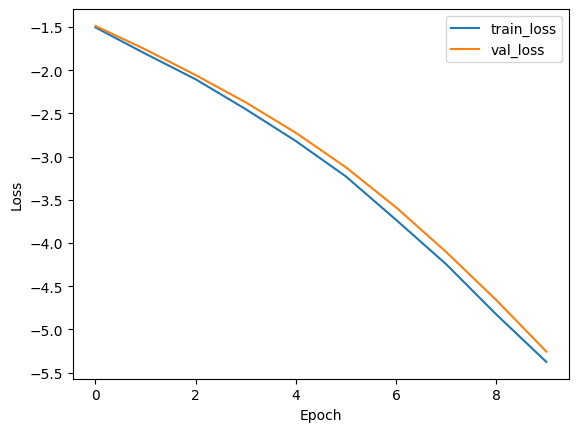

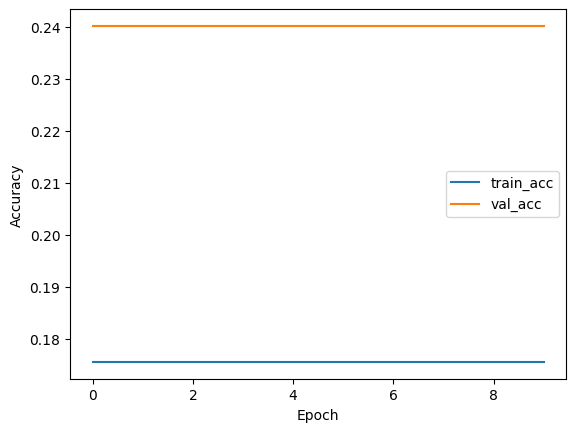

In [414]:
# Visualize
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [415]:
# evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2103 - loss: -2.5969 
Test Loss: -2.4948251247406006
Test Accuracy: 0.2402234673500061
